In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

df = pd.read_csv("dc_motor_data.csv")

# Übersicht
print(df.shape)         # z. B. (58509, 49) → 48 Features + 1 Label
print(df.columns)       # Zeigt die Spaltennamen
print(df.head())        # Erste 5 Zeilen


(29255, 49)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'class'],
      dtype='object')
             V1            V2        V3            V4            V5  \
0  2.913200e-06 -5.247700e-06  0.000003 -6.056100e-06  2.778900e-06   
1 -9.584900e-07  5.214300e-08 -0.000047  6.453700e-07 -2.304100e-06   
2 -2.566600e-06 -1.679500e-07  0.000015 -1.598400e-06  8.709200e-07   
3  2.825600e-06  6.067600e-06  0.000118 -4.347500e-06  1.492300e-06   
4 -6.573800e-07 -3.951900e-07  0.000032 -5.296100e-06 -1.605800e-06   

             V6        V7        V8        V9       V10  ...      V40  \
0 -3.752400e-06  0.030804  0.030810  0.030806 -0.033520  ... -0.59314   
1  5.499900e-05  0.03

In [10]:
# Features (ohne Label)
X = df.drop(columns=["class"])

# Zielvariable / Labels
y = df["class"]


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [14]:
# 1. Dimensionalität mit PCA reduzieren (z. B. auf 2 für Visualisierung)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. KMeans Clustering mit 11 Clustern (wir wissen, dass es 11 Klassen gibt)
kmeans = KMeans(n_clusters=11, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# 3. Clustering-Qualität bewerten
ari = adjusted_rand_score(y, cluster_labels)
silhouette = silhouette_score(X_pca, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

C:\Users\Isabell Krüger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI): 0.0003
Silhouette Score: 0.5439


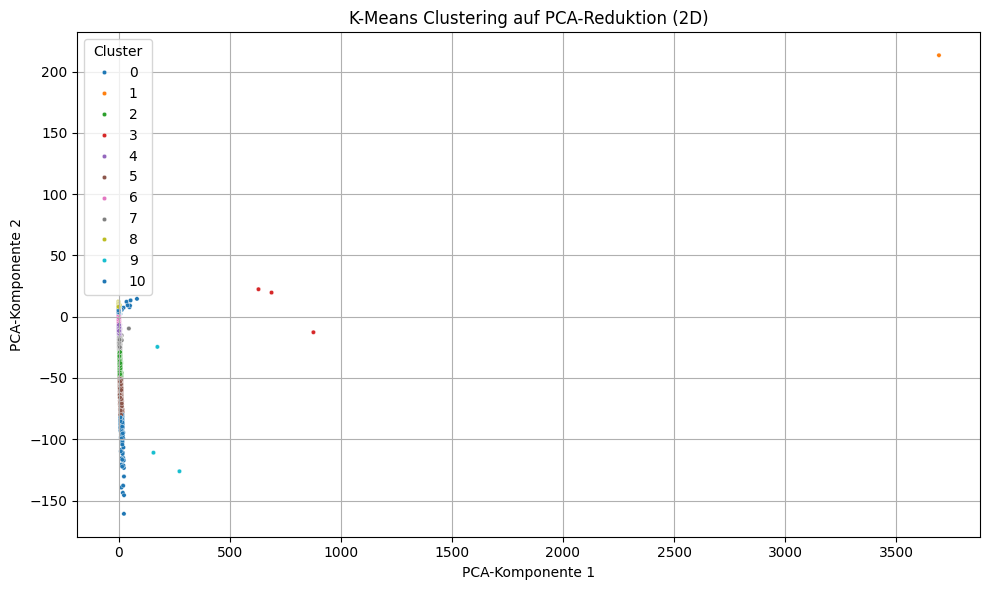

In [15]:
# 4. Visualisierung
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='tab10', s=10, legend='full')
plt.title("K-Means Clustering auf PCA-Reduktion (2D)")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()